In [121]:
import pandas as pd
import seaborn as sns
from aequitas.group import Group
from aequitas.bias import Bias
from aequitas.fairness import Fairness
from aequitas.plotting import Plot
import pickle
import os
import numpy as np
from starter.starter.ml.data import process_data
# import warnings; warnings.simplefilter('ignore')

%matplotlib inline

In [122]:
path = os.getcwd()
print(path)
data_path = os.path.join(path, 'starter/data/adult.csv')

/Users/vanessavasconcellos/Documents/Project3_Mlops/nd0821-c3-starter-code


In [123]:
df_header =["age",
"workclass",
"fnlwgt",
"education",
"education-num",
"marital-status",
"occupation",
"relationship",
"race",
"sex",
"capital-gain",
"capital-loss",
"hours-per-week",
"native-country",
"label_value"]
df = pd.read_csv(data_path, header=None, names= df_header, index_col=False)

In [124]:
#train-test split.
cat_features = [
    "workclass",
    "education",
    "marital-status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "native-country",
]
X, y, encoder, lb = process_data(
    df, categorical_features=cat_features, label='label_value', training=True
)

In [125]:
with open(os.getcwd()+ '/'+ 'starter/model/final_model1.pkl','rb') as f:
        clf = pickle.load(f)

In [126]:
y_pred = clf.predict(X)

In [127]:
y_pred = pd.DataFrame(y_pred)

In [128]:
y = pd.DataFrame(y)
y

,0
0,0
1,0
2,0
3,0
4,0
...,...
32556,0
32557,1
32558,0
32559,0


In [129]:
df["score"] = y_pred
del df['label_value'] 

In [130]:
df_catagorical=df.select_dtypes(include=['object'])

In [131]:
df_catagorical['score'] =y_pred
df_catagorical['label_value'] =y
df_final =df_catagorical[['race','sex','occupation','score','label_value']]

In [132]:
g = Group()
xtab, _ = g.get_crosstabs(df_final)

/Users/vanessavasconcellos/ls/envs/project3_Mlops/lib/python3.8/site-packages/aequitas/group.py:182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'score'] = df.loc[:,'score'].astype(float)


In [133]:
absolute_metrics = g.list_absolute_metrics(xtab)

In [134]:
xtab[[col for col in xtab.columns if col not in absolute_metrics]]

,model_id,score_threshold,k,attribute_name,attribute_value,pp,pn,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities
0,0,binary 0/1,6360,race,Amer-Indian-Eskimo,24,287,7,19,268,17,36,275,311,32561
1,0,binary 0/1,6360,race,Asian-Pac-Islander,238,801,64,102,699,174,276,763,1039,32561
2,0,binary 0/1,6360,race,Black,250,2874,53,190,2684,197,387,2737,3124,32561
3,0,binary 0/1,6360,race,Other,14,257,3,14,243,11,25,246,271,32561
4,0,binary 0/1,6360,race,White,5834,21982,1278,2561,19421,4556,7117,20699,27816,32561
5,0,binary 0/1,6360,sex,Female,847,9924,195,527,9397,652,1179,9592,10771,32561
6,0,binary 0/1,6360,sex,Male,5513,16277,1210,2359,13918,4303,6662,15128,21790,32561
7,0,binary 0/1,6360,occupation,?,124,1719,35,102,1617,89,191,1652,1843,32561
8,0,binary 0/1,6360,occupation,Adm-clerical,311,3459,77,273,3186,234,507,3263,3770,32561
9,0,binary 0/1,6360,occupation,Armed-Forces,1,8,0,0,8,1,1,8,9,32561


In [135]:
xtab[['attribute_name', 'attribute_value'] + absolute_metrics].round(2)

,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,fnr,npv,precision,ppr,pprev,prev
0,race,Amer-Indian-Eskimo,0.47,0.97,0.07,0.29,0.03,0.53,0.93,0.71,0.00,0.08,0.12
1,race,Asian-Pac-Islander,0.63,0.92,0.13,0.27,0.08,0.37,0.87,0.73,0.04,0.23,0.27
2,race,Black,0.51,0.98,0.07,0.21,0.02,0.49,0.93,0.79,0.04,0.08,0.12
3,race,Other,0.44,0.99,0.05,0.21,0.01,0.56,0.95,0.79,0.00,0.05,0.09
4,race,White,0.64,0.94,0.12,0.22,0.06,0.36,0.88,0.78,0.92,0.21,0.26
5,sex,Female,0.55,0.98,0.05,0.23,0.02,0.45,0.95,0.77,0.13,0.08,0.11
6,sex,Male,0.65,0.92,0.14,0.22,0.08,0.35,0.86,0.78,0.87,0.25,0.31
7,occupation,?,0.47,0.98,0.06,0.28,0.02,0.53,0.94,0.72,0.02,0.07,0.10
8,occupation,Adm-clerical,0.46,0.98,0.08,0.25,0.02,0.54,0.92,0.75,0.05,0.08,0.13
9,occupation,Armed-Forces,1.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.11,0.11


In [136]:
aqp = Plot()

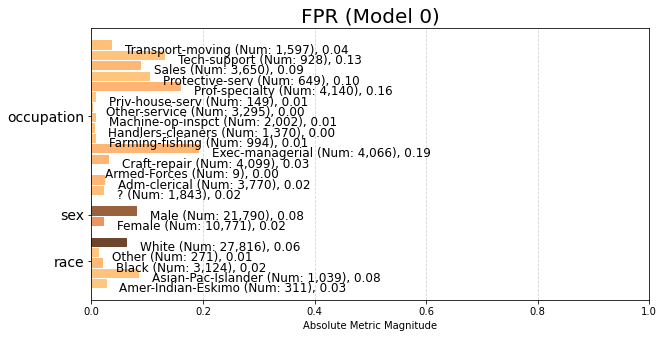

In [137]:
fnr = aqp.plot_group_metric(xtab, 'fpr')